# Modeling

## Question 1

Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

Choose features other than the ones used in the lesson.  
Visualize the results of your clustering.  
Use the elbow method to visually select a good value for k.  
Repeat the clustering, this time with 3 different features.

In [1]:
#Disable autosave
%autosave 0

Autosave disabled


In [2]:
#Import dependencies
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from acquire import mall_dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
#Read in iris dataset
df = data('iris')

df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
#Give the columns proper names
df.rename(columns={'Sepal.Width': 'sepal_width', 'Petal.Width': 'petal_width',
                   'Sepal.Length': 'sepal_length', 'Petal.Length': 'petal_length',
                   'Species': 'species'}, inplace=True)

In [5]:
seed = 42

train, test_val = train_test_split(df, train_size=0.7,
                                   random_state=seed)

test, val = train_test_split(test_val, train_size=0.5,
                             random_state=seed)

In [6]:
#Declare an X subset of the data
X_train = train[['petal_width', 'sepal_width']]

In [7]:
#Initialize KMeans and fit it to the X subset
kmeans = KMeans(n_clusters=3)

kmeans.fit(X_train)

kmeans.predict(X_train)

array([2, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2,
       0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1,
       0, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 1,
       0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0], dtype=int32)

In [8]:
#Create a new column in the dataframe of my predictions
train['cluster'] = kmeans.predict(X_train)

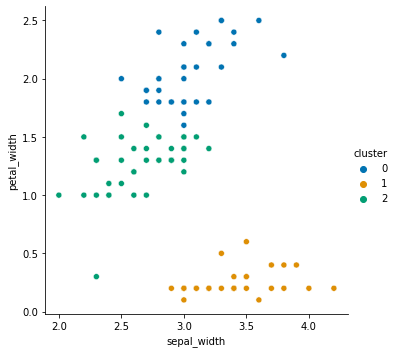

In [9]:
#Plot my predictions
sns.relplot(x='sepal_width', y='petal_width', hue='cluster',
            palette='colorblind', data=train)

Text(0.5, 1.0, 'Clusters generated by KMeans.')

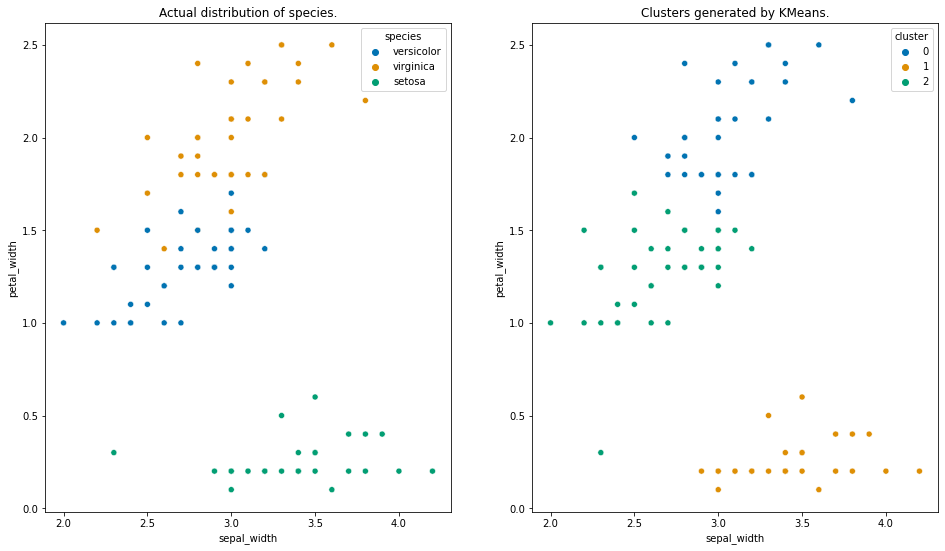

In [10]:
#Plot the actual distribution of species next to my generated clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax=axes[0], x='sepal_width', y='petal_width', hue='species',
                palette='colorblind', data=train)
axes[0].set_title('Actual distribution of species.')

sns.scatterplot(ax=axes[1], x='sepal_width', y='petal_width', hue='cluster',
                palette='colorblind', data=train)
axes[1].set_title('Clusters generated by KMeans.')

In [11]:
#Fill a list with inertia values for increasing number of clusters
inertia_list = []

for i in range(2, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    inertia_list.append(kmeans.inertia_)
    
inertia_list    

[26.498234524847426,
 13.827797619047619,
 10.040651901246328,
 7.910924242424242,
 5.929071484071484,
 5.071916000666001]

Text(0.5, 0, 'Number of clusters')

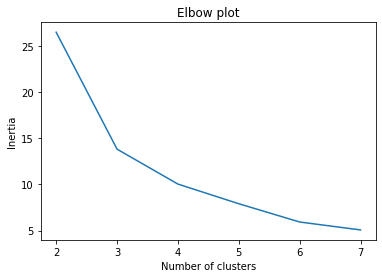

In [12]:
#Beautiful elbow graph
sns.lineplot(x=range(2, 8), y=inertia_list)
plt.title('Elbow plot')
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')

In [13]:
#Create a new X subset with 3 features
X2_train = train[['sepal_length', 'petal_length', 'sepal_width']]

In [14]:
#Fit a KMeans model to my 3 feature dataset
kmeans2 = KMeans(n_clusters=3)

kmeans2.fit(X2_train)

kmeans2.predict(X2_train)

array([0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 1,
       0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0,
       0, 2, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 2, 1,
       2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2], dtype=int32)

In [15]:
#Store my predictions in the dataframe
train['cluster_3f'] = kmeans2.predict(X2_train)

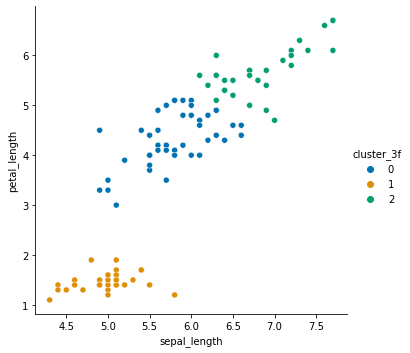

In [16]:
#Visualize my results
sns.relplot(x='sepal_length', y='petal_length', hue='cluster_3f',
            palette='colorblind', data=train)

Text(0.5, 1.0, 'Clusters generated by KMeans using 3 features.')

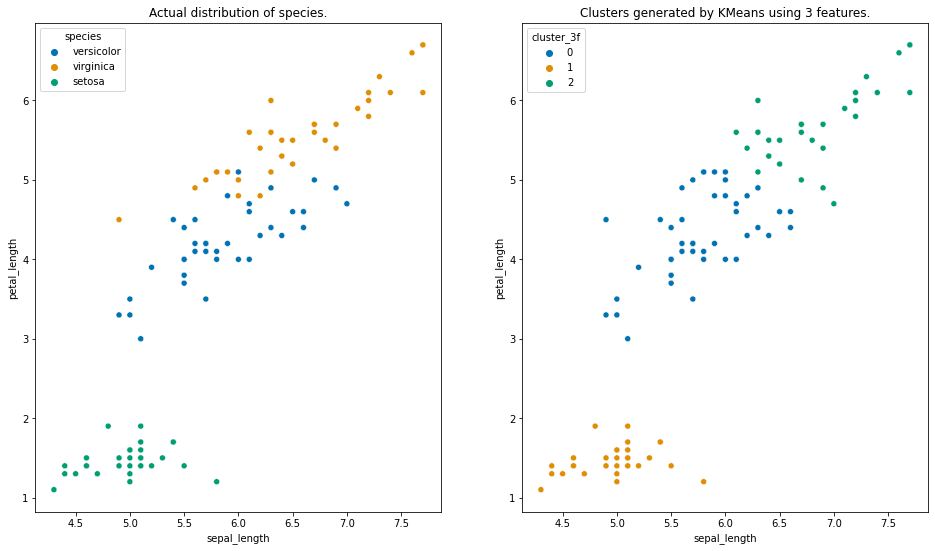

In [17]:
#Compare my results to the actual distribution of species
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax=axes[0], x='sepal_length', y='petal_length', hue='species',
                palette='colorblind', data=train)
axes[0].set_title('Actual distribution of species.')

sns.scatterplot(ax=axes[1], x='sepal_length', y='petal_length', hue='cluster_3f',
                palette='colorblind', data=train)
axes[1].set_title('Clusters generated by KMeans using 3 features.')

In [18]:
#Create a list of inertias for models fit to my 3 features
inertia_list_3f = []

for i in range(2, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X2_train)
    inertia_list_3f.append(kmeans.inertia_)
    
inertia_list_3f    

[100.9303314001657,
 48.533219941348975,
 33.5565858058766,
 27.486498909520385,
 23.597082666343276,
 19.25608521303258]

Text(0.5, 0, 'Number of clusters')

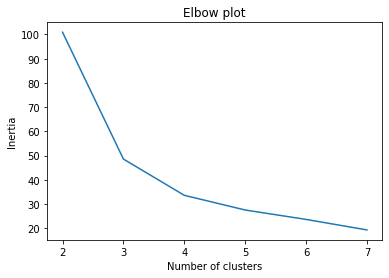

In [19]:
#Plot the inertia over number of clusters
sns.lineplot(x=range(2, 8), y=inertia_list_3f)
plt.title('Elbow plot')
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')

## Question 2

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [20]:
#Read in the mall dataset
mall_df = mall_dataset()

mall_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
#Select a couple features for clustering
mall_X = mall_df[['age', 'annual_income']]

In [22]:
#Initialize the KMeans model and fit it to my features
mall_kmeans = KMeans(n_clusters=5)

mall_kmeans.fit(mall_X)

mall_kmeans.predict(mall_X)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 0,
       4, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 0, 0, 4, 4, 0, 4, 4, 0, 4, 4, 0,
       0, 4, 4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       4, 0, 2, 0, 0, 0, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [23]:
#Store the clusters in a new column
mall_df['cluster'] = mall_kmeans.predict(mall_X)

<AxesSubplot:xlabel='age', ylabel='annual_income'>

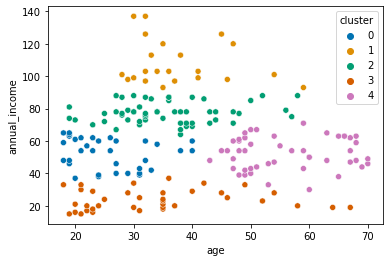

In [24]:
#Visualize the results
sns.scatterplot(x='age', y='annual_income', hue='cluster',
                palette='colorblind', data=mall_df)

In [25]:
#Fit KMeans to my data using an increasing number of clusters
mall_inertia = []

for i in range(2, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(mall_X)
    mall_inertia.append(kmeans.inertia_)
    
mall_inertia

[87121.56591478697,
 59486.96143928035,
 39529.8879673635,
 31662.412142758716,
 25519.571916971916,
 21861.25553749238]

Text(0.5, 0, 'Number of clusters')

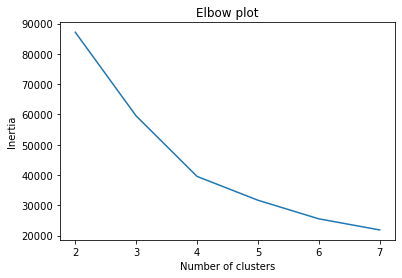

In [26]:
#Generate an elbow plot
sns.lineplot(x=range(2, 8), y=mall_inertia)
plt.title('Elbow plot')
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')

## Question 3

How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [27]:
#Create a copy of my original dataframe to scale
mall_df_scale = mall_df.copy()

In [28]:
#Create an instance of the scaler and fit/transform the same features I used before
mms = MinMaxScaler()

mall_df_scale[['age', 'annual_income']] = mms.fit_transform(mall_df_scale[['age', 'annual_income']])

mall_df_scale.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,0.019231,0.000000,39,3
1,2,Male,0.057692,0.000000,81,3
2,3,Female,0.038462,0.008197,6,3
3,4,Female,0.096154,0.008197,77,3
4,5,Female,0.250000,0.016393,40,3


In [29]:
#Subset these scaled features for training
X_scale = mall_df_scale[['age', 'annual_income']]

In [30]:
#Fit a new model to my scaled data
kmeans_scale = KMeans(n_clusters=5)

kmeans_scale.fit(X_scale)

kmeans_scale.predict(X_scale)

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       4, 2, 0, 2, 4, 2, 2, 2, 0, 2, 0, 2, 4, 2, 4, 2, 2, 2, 0, 2, 4, 2,
       4, 2, 4, 2, 2, 2, 4, 2, 2, 0, 4, 4, 4, 0, 2, 4, 0, 2, 0, 0, 0, 2,
       4, 0, 2, 2, 0, 4, 0, 0, 0, 1, 4, 4, 1, 4, 0, 4, 0, 4, 1, 4, 4, 1,
       1, 4, 0, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 0, 1, 4, 1, 0, 4, 0, 0,
       0, 1, 4, 1, 1, 1, 0, 4, 4, 4, 1, 4, 4, 4, 1, 1, 4, 4, 0, 4, 4, 4,
       1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 3, 4, 3,
       4, 1, 3, 1, 1, 1, 4, 1, 1, 1, 4, 3, 3, 3, 3, 3, 3, 1, 3, 3, 4, 1,
       4, 1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [31]:
#Store the resuts in a new column
mall_df_scale['cluster'] = kmeans_scale.predict(X_scale)

Text(0.5, 1.0, 'Clusters formed with scaled data.')

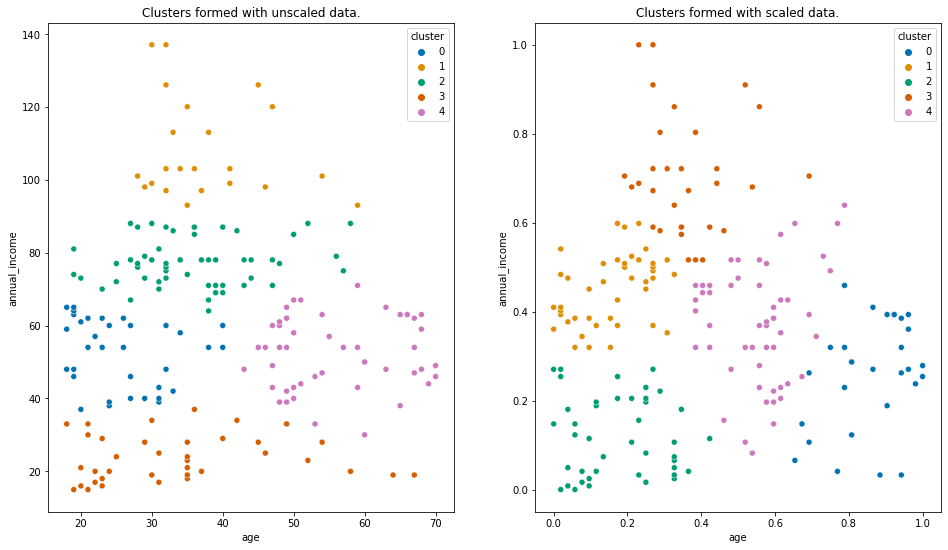

In [32]:
#Compare the clusters generated by scaled and unscaled data
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax=axes[0], x='age', y='annual_income', hue='cluster',
                palette='colorblind', data=mall_df)
axes[0].set_title('Clusters formed with unscaled data.')

sns.scatterplot(ax=axes[1], x='age', y='annual_income', hue='cluster',
                palette='colorblind', data=mall_df_scale)
axes[1].set_title('Clusters formed with scaled data.')